In [1]:
# As usual, a bit of setup

import numpy as np
import matplotlib.pyplot as plt
from deeplearning.classifiers.cnn import *
from deeplearning.data_utils import get_CIFAR10_data
from deeplearning.gradient_check import eval_numerical_gradient_array, eval_numerical_gradient
from deeplearning.layers import *
from deeplearning.fast_layers import *
from deeplearning.solver import Solver

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
  """ returns relative error """
  return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [2]:
# Load the (preprocessed) CIFAR10 data.

data = get_CIFAR10_data()

In [8]:
# Train a really good model on CIFAR-10
from deeplearning.classifiers.convnet2 import *
model = HaoConvNet2(weight_scale=0.006, hidden_dim=512, reg=0.001, dropout=0.5)

solver = Solver(model, data,
                num_epochs=30, batch_size=128,
                update_rule='sgd',
                lr_decay = 0.9,
                optim_config={
                  'learning_rate': 1e-1,
                },
                verbose=True, print_every=60)
solver.train()

(Iteration 1 / 11460) loss: 2.304908
(Epoch 0 / 30) train acc: 0.140000; val_acc: 0.125000
(Iteration 61 / 11460) loss: 1.815724
(Iteration 121 / 11460) loss: 1.667814
(Iteration 181 / 11460) loss: 1.561666
(Iteration 241 / 11460) loss: 1.626941
(Iteration 301 / 11460) loss: 1.426775
(Iteration 361 / 11460) loss: 1.354693
Time elapsed (hh:mm:ss.ms) 0:04:26.874366
(Epoch 1 / 30) train acc: 0.524000; val_acc: 0.536000
(Iteration 421 / 11460) loss: 1.217321
(Iteration 481 / 11460) loss: 1.491550
(Iteration 541 / 11460) loss: 1.316259
(Iteration 601 / 11460) loss: 1.333362
(Iteration 661 / 11460) loss: 1.197969
(Iteration 721 / 11460) loss: 1.063176
Time elapsed (hh:mm:ss.ms) 0:08:43.729293
(Epoch 2 / 30) train acc: 0.603000; val_acc: 0.608000
(Iteration 781 / 11460) loss: 1.257235
(Iteration 841 / 11460) loss: 1.127360
(Iteration 901 / 11460) loss: 1.091391
(Iteration 961 / 11460) loss: 1.130596
(Iteration 1021 / 11460) loss: 1.054131
(Iteration 1081 / 11460) loss: 1.046658
(Iteration 114

(Iteration 8941 / 11460) loss: 0.558303
(Iteration 9001 / 11460) loss: 0.658981
(Iteration 9061 / 11460) loss: 0.506983
(Iteration 9121 / 11460) loss: 0.567759
Time elapsed (hh:mm:ss.ms) 1:43:29.354649
(Epoch 24 / 30) train acc: 0.843000; val_acc: 0.753000
(Iteration 9181 / 11460) loss: 0.772625
(Iteration 9241 / 11460) loss: 0.523673
(Iteration 9301 / 11460) loss: 0.516157
(Iteration 9361 / 11460) loss: 0.611255
(Iteration 9421 / 11460) loss: 0.506662
(Iteration 9481 / 11460) loss: 0.525243
(Iteration 9541 / 11460) loss: 0.571035
Time elapsed (hh:mm:ss.ms) 1:47:50.168064
(Epoch 25 / 30) train acc: 0.825000; val_acc: 0.761000
(Iteration 9601 / 11460) loss: 0.599588
(Iteration 9661 / 11460) loss: 0.534166
(Iteration 9721 / 11460) loss: 0.470447
(Iteration 9781 / 11460) loss: 0.670302
(Iteration 9841 / 11460) loss: 0.500577
(Iteration 9901 / 11460) loss: 0.582079
Time elapsed (hh:mm:ss.ms) 1:52:09.731614
(Epoch 26 / 30) train acc: 0.849000; val_acc: 0.757000
(Iteration 9961 / 11460) loss

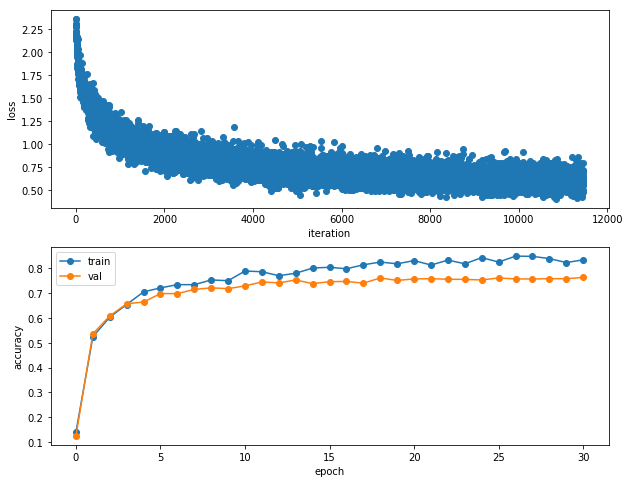

In [9]:
plt.subplot(2, 1, 1)
plt.plot(solver.loss_history, 'o')
plt.xlabel('iteration')
plt.ylabel('loss')

plt.subplot(2, 1, 2)
plt.plot(solver.train_acc_history, '-o')
plt.plot(solver.val_acc_history, '-o')
plt.legend(['train', 'val'], loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
test_acc = solver.check_accuracy(data['X_test'], data['y_test'])
print 'test acc: %f' % (test_acc)

test acc: 0.734000


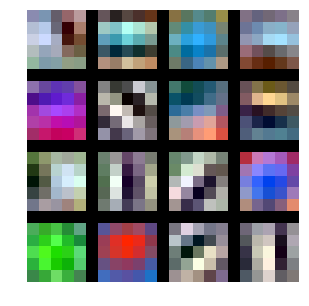

In [12]:
from deeplearning.vis_utils import visualize_grid

grid = visualize_grid(model.params['W0'].transpose(0, 2, 3, 1))
plt.imshow(grid.astype('uint8'))
plt.axis('off')
plt.gcf().set_size_inches(5, 5)
plt.show()

In [13]:
import pickle
with open('result_convnet2_1', 'wb') as f:
    pickle.dump([solver.loss_history, solver.train_acc_history,solver.val_acc_history], f)